# Consumo de Drogas

## Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    """
    Carga la base de datos "data.xlsx".
    
    Returns:
        df: Dictionary con todas las bases.
    """
    # Carga de datos
    df = pd.read_excel("../data/consumo-drogas.xlsx", sheet_name=None)
    return df

def get_data_prevalencia(df):
    df_prevalencia = df['prevalencia']
    return df_prevalencia

def get_data_incidencia(df):
    df_incidencia = df['incidencia']
    return df_incidencia

def get_data_edad(df):
    df_edad = df['edad']
    return df_edad

In [3]:
df = load_data()
df_prevalencia = get_data_prevalencia(df)
df_incidencia = get_data_incidencia(df)
df_edad = get_data_edad(df)

## Prevalencia de consumo

In [12]:
# Datos a filtrar

# Rango de años
gestion = [2007, 2023]
start_year = int(gestion[0])
end_year = int(gestion[1])
# Sustancia
sustancia='Alcohol'
# Lugar
lugar='Bolivia'
# Medida
prevalencia='Vida'
# Sexo
sexo = 'Total'

In [14]:
filtered_df_prevalencia = df_prevalencia[
            (df_prevalencia['Gestion'] >= start_year) &
            (df_prevalencia['Gestion'] <= end_year) &
            (df_prevalencia['Sustancia'] == sustancia) &
            (df_prevalencia['Lugar'] == lugar) &
            (df_prevalencia['Prevalencia de consumo'] == prevalencia) &
            (df_prevalencia['Sexo'] == sexo)]
filtered_df_prevalencia.head()

,Gestion,Sustancia,Lugar,Prevalencia de consumo,Valor,Sexo
0,2007,Alcohol,Bolivia,Vida,76.4,Total
1,2014,Alcohol,Bolivia,Vida,69.4,Total
2,2018,Alcohol,Bolivia,Vida,62.7,Total
3,2023,Alcohol,Bolivia,Vida,58.1,Total


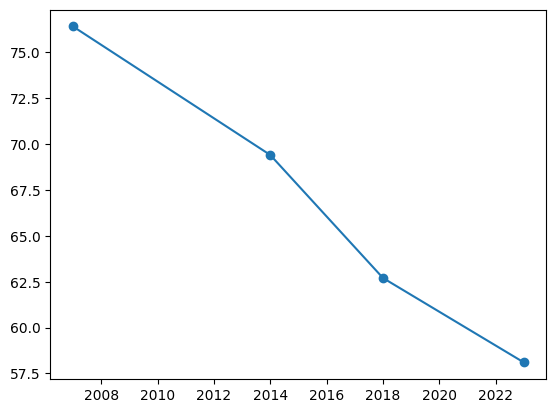

In [27]:
# Graficamos
plt.plot(filtered_df_prevalencia['Gestion'], filtered_df_prevalencia['Valor'], marker='o')

## Edad de inicio de consumo

In [18]:
# Filtramos
filtered_df_edad = df_edad[
            (df_edad['Lugar'] == 'Bolivia') &
            (df_edad['Medida'] == 'Media')
        ]
filtered_df_edad.head()

,Gestion,Sustancia,Lugar,Medida,Valor,Tipo Sustancia
0,2007,Alcohol,Bolivia,Media,18.71,Lícita
1,2014,Alcohol,Bolivia,Media,19.05,Lícita
34,2018,Alcohol,Bolivia,Media,19.30,Lícita
45,2023,Alcohol,Bolivia,Media,23.00,Lícita
48,2007,Tabaco,Bolivia,Media,19.00,Lícita


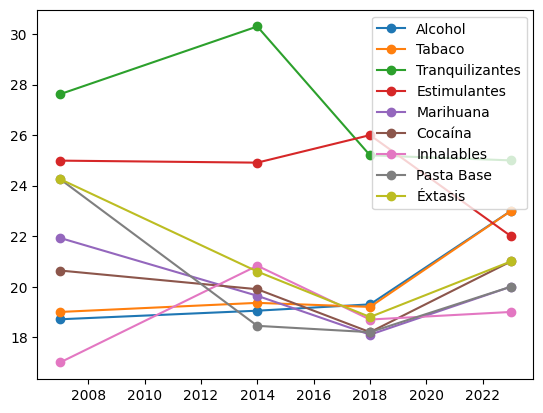

In [38]:
# Obtenemos las sustancias únicas
sustancias = filtered_df_edad['Sustancia'].unique()

# Graficamos por cada sustancia
for i, sustancia in enumerate(sustancias):
    datos_sustancia = filtered_df_edad[filtered_df_edad['Sustancia'] == sustancia]
    plt.plot(datos_sustancia['Gestion'], datos_sustancia['Valor'], marker='o', label=sustancia)

plt.legend()

## Incidencia de consumo

In [34]:
# Datos a filtrar

# Rango de años
gestion = [2007, 2023]
start_year = int(gestion[0])
end_year = int(gestion[1])
# Sustancia
sustancia='Alcohol'
# Medida de incidencia
incidencia = 'Últimos 12 meses'

In [35]:
# Aplicamos filtros
filtered_df_incidencia = df_incidencia[
            (df_incidencia['Gestion'] >= start_year) &
            (df_incidencia['Gestion'] <= end_year) &
            (df_incidencia['Sustancia'] == sustancia) &
            (df_incidencia['Incidencia'] == incidencia)]
filtered_df_incidencia.head()

,Gestion,Sustancia,Lugar,Incidencia,Valor
0,2023,Alcohol,Bolivia,Últimos 12 meses,36.70
12,2018,Alcohol,Bolivia,Últimos 12 meses,10.30
24,2014,Alcohol,Bolivia,Últimos 12 meses,3.65


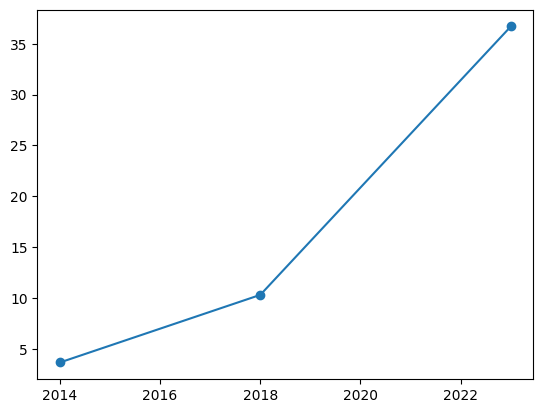

In [37]:
# Graficamos
plt.plot(filtered_df_incidencia['Gestion'], filtered_df_incidencia['Valor'], marker='o')